In [350]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [351]:
exp_root = "/media/yesindeed/DATADRIVE1/mount/remote_cse/experiments/med_vlm_benchmark/diagnosis"

df_results = pd.read_csv(os.path.join(exp_root, "exp_status.csv"))

df_results

,dataset,model,strategy,pred_file,rel_path,n,auroc,ci_low,ci_high,auc_std,status
0,Camelyon17,BLIP2-2.7b,eval_seed0/original_pretrained,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/eval_seed0/original_pret...,920,0.517358,0.479656,0.555933,0.019424,OK
1,Camelyon17,BLIP2-2.7b,train_img-lora-lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/train_img-lora-lp_seed42,920,0.982491,0.975661,0.988340,0.003237,OK
2,Camelyon17,BLIP2-2.7b,train_lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/train_lp_seed42,920,0.981262,0.974411,0.987425,0.003409,OK
3,Camelyon17,BioMedCLIP,eval_seed0/original_pretrained,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BioMedCLIP/eval_seed0/original_pret...,920,0.771692,0.741732,0.802931,0.015638,OK
4,Camelyon17,BioMedCLIP,train_img-lora-lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BioMedCLIP/train_img-lora-lp_seed42,920,0.986990,0.981275,0.992037,0.002773,OK
...,...,...,...,...,...,...,...,...,...,...,...
139,PAPILA,PubMedCLIP,train_img-lora-lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/PubMedCLIP/train_img-lora-lp_seed42,56,0.794326,0.658853,0.915159,0.066019,OK
140,PAPILA,PubMedCLIP,train_lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/PubMedCLIP/train_lp_seed42,56,0.517730,0.307061,0.734405,0.107715,OK
141,PAPILA,SigLIP,eval_seed0/original_pretrained,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/SigLIP/eval_seed0/original_pretrained,56,0.517730,0.327592,0.734383,0.104283,OK
142,PAPILA,SigLIP,train_img-lora-lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/SigLIP/train_img-lora-lp_seed42,56,0.713948,0.533528,0.876771,0.086208,OK


In [352]:
df_results["strategy"].value_counts()

strategy
eval_seed0/original_pretrained    48
train_img-lora-lp_seed42          48
train_lp_seed42                   48
Name: count, dtype: int64

In [353]:
df_results["strategy"] = df_results["strategy"].replace(
    "train_img-lora-lp_seed42", "FT-LoRA")
df_results["strategy"] = df_results["strategy"].replace(
    "train_lp_seed42", "FT-LP")
df_results["strategy"] = df_results["strategy"].replace(
    "eval_seed0/original_pretrained", "ZS")


df_results["strategy"].value_counts()

strategy
ZS         48
FT-LoRA    48
FT-LP      48
Name: count, dtype: int64

In [354]:
for dataset, dataset_group in df_results.groupby("dataset"):
    for model, model_group in dataset_group.groupby("model"):
        break

model_group

,dataset,model,strategy,pred_file,rel_path,n,auroc,ci_low,ci_high,auc_std,status
120,PAPILA,BLIP2-2.7b,ZS,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/BLIP2-2.7b/eval_seed0/original_pretrained,56,0.401891,0.172012,0.610679,0.112636,OK
121,PAPILA,BLIP2-2.7b,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/BLIP2-2.7b/train_img-lora-lp_seed42,56,0.940898,0.860058,0.990578,0.033262,OK
122,PAPILA,BLIP2-2.7b,FT-LP,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/BLIP2-2.7b/train_lp_seed42,56,0.869976,0.725141,0.976195,0.063681,OK


In [355]:
df_results["dataset+strategy"] = df_results["dataset"] + "-" + df_results["strategy"]
df_results

,dataset,model,strategy,pred_file,rel_path,n,auroc,ci_low,ci_high,auc_std,status,dataset+strategy
0,Camelyon17,BLIP2-2.7b,ZS,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/eval_seed0/original_pret...,920,0.517358,0.479656,0.555933,0.019424,OK,Camelyon17-ZS
1,Camelyon17,BLIP2-2.7b,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/train_img-lora-lp_seed42,920,0.982491,0.975661,0.988340,0.003237,OK,Camelyon17-FT-LoRA
2,Camelyon17,BLIP2-2.7b,FT-LP,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/train_lp_seed42,920,0.981262,0.974411,0.987425,0.003409,OK,Camelyon17-FT-LP
3,Camelyon17,BioMedCLIP,ZS,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BioMedCLIP/eval_seed0/original_pret...,920,0.771692,0.741732,0.802931,0.015638,OK,Camelyon17-ZS
4,Camelyon17,BioMedCLIP,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BioMedCLIP/train_img-lora-lp_seed42,920,0.986990,0.981275,0.992037,0.002773,OK,Camelyon17-FT-LoRA
...,...,...,...,...,...,...,...,...,...,...,...,...
139,PAPILA,PubMedCLIP,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/PubMedCLIP/train_img-lora-lp_seed42,56,0.794326,0.658853,0.915159,0.066019,OK,PAPILA-FT-LoRA
140,PAPILA,PubMedCLIP,FT-LP,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/PubMedCLIP/train_lp_seed42,56,0.517730,0.307061,0.734405,0.107715,OK,PAPILA-FT-LP
141,PAPILA,SigLIP,ZS,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/SigLIP/eval_seed0/original_pretrained,56,0.517730,0.327592,0.734383,0.104283,OK,PAPILA-ZS
142,PAPILA,SigLIP,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/SigLIP/train_img-lora-lp_seed42,56,0.713948,0.533528,0.876771,0.086208,OK,PAPILA-FT-LoRA


In [356]:
df_results["model"].value_counts()

model
BLIP2-2.7b    18
BioMedCLIP    18
CLIP          18
MedCLIP       18
MedSigLIP     18
PLIP          18
PubMedCLIP    18
SigLIP        18
Name: count, dtype: int64

In [357]:
ID_dict = {
    "MedCLIP": ["CheXpert"],
    "PubMedCLIP": ["CheXpert"],
    "BioMedCLIP": ["CheXpert", "HAM10000", "Camelyon17"],
    "PLIP": ["Camelyon17"],
    "MedSigLIP": ["CheXpert", "Camelyon17", "PAPILA", "HAM10000", "PAPILA"],
}
general_models = ["CLIP", "BLIP2-2.7b", "SigLIP"]

model_familis = []
model_types = []
is_ood = []

for dataset, model in zip(df_results["dataset"].tolist(), df_results["model"].tolist()):
    if not model in ID_dict.keys():
        is_ood.append(1)
    elif dataset not in ID_dict[model]:
        is_ood.append(1)
    else:
        is_ood.append(0)

    if model in general_models:
        model_types.append("general")
    else:
        model_types.append("medical")

    if "SigLIP" in model:
        model_familis.append("SigLIP")
    else:
        model_familis.append("CLIP")


df_results["is_ood"] = is_ood
df_results["model_family"] = model_familis
df_results["model_type"] = model_types

In [358]:
model_order = [
    "CLIP",
    "BLIP2-2.7b",
    "MedCLIP",
    "PLIP",
    "PubMedCLIP",
    "BioMedCLIP",
    "SigLIP",
    "MedSigLIP",
]

data_order = [
    "CheXpert-ZS",
    "CheXpert-FT-LP",
    "Camelyon17-ZS",
    "Camelyon17-FT-LP",
    "HAM10000-ZS",
    "HAM10000-FT-LP",
    "PAPILA-ZS",
    "PAPILA-FT-LP",
    "GF3300-ZS",
    "GF3300-FT-LP",
    "HarvardFairVLMed10k-ZS",
    "HarvardFairVLMed10k-FT-LP",
]

metric = "auroc"
df_plot = df_results.copy(deep=True)

df_plot[metric] = df_plot[metric] * 100

data_heatmap = df_plot.pivot(index="model", columns="dataset+strategy", values=metric)
data_heatmap = data_heatmap.reindex(model_order, axis=0)
data_heatmap = data_heatmap.reindex(data_order, axis=1)
data_heatmap

dataset+strategy,CheXpert-ZS,CheXpert-FT-LP,Camelyon17-ZS,Camelyon17-FT-LP,HAM10000-ZS,HAM10000-FT-LP,PAPILA-ZS,PAPILA-FT-LP,GF3300-ZS,GF3300-FT-LP,HarvardFairVLMed10k-ZS,HarvardFairVLMed10k-FT-LP
model,,,,,,,,,,,,
CLIP,40.950591,82.142857,52.956522,96.786389,46.469872,83.879850,59.810875,76.122931,47.534393,79.160287,58.021569,68.384604
BLIP2-2.7b,56.941461,86.023093,51.735822,98.126181,54.138297,87.589285,40.189125,86.997636,36.826466,81.125741,39.162081,71.837285
MedCLIP,90.601504,86.936090,76.385633,81.704631,48.655938,73.544424,36.406619,81.560284,38.147732,70.983181,52.137737,61.087541
PLIP,46.817938,84.707304,74.478025,98.525992,45.757067,84.322467,52.009456,67.612293,36.346727,78.233700,46.135791,69.198073
PubMedCLIP,76.436627,84.344791,33.043006,95.585066,41.247753,84.110247,37.588652,51.773050,41.343722,77.146065,46.019450,69.098868
BioMedCLIP,60.714286,88.520408,77.169187,98.573724,56.787121,86.539482,76.122931,72.340426,47.859322,81.722296,54.346447,71.865517
SigLIP,53.423738,85.365199,59.812854,97.214083,46.989983,87.338747,51.773050,71.158392,55.230626,77.201638,53.024018,71.451363
MedSigLIP,62.285177,88.909774,42.135870,98.601134,52.697090,86.201256,56.973995,87.943262,54.549579,76.531364,59.661442,73.528435


In [359]:
mask = df_plot.pivot(index="model", columns="dataset+strategy", values="is_ood")
mask = mask.reindex(model_order, axis=0)
mask = mask.reindex(data_order, axis=1)
mask

dataset+strategy,CheXpert-ZS,CheXpert-FT-LP,Camelyon17-ZS,Camelyon17-FT-LP,HAM10000-ZS,HAM10000-FT-LP,PAPILA-ZS,PAPILA-FT-LP,GF3300-ZS,GF3300-FT-LP,HarvardFairVLMed10k-ZS,HarvardFairVLMed10k-FT-LP
model,,,,,,,,,,,,
CLIP,1,1,1,1,1,1,1,1,1,1,1,1
BLIP2-2.7b,1,1,1,1,1,1,1,1,1,1,1,1
MedCLIP,0,0,1,1,1,1,1,1,1,1,1,1
PLIP,1,1,0,0,1,1,1,1,1,1,1,1
PubMedCLIP,0,0,1,1,1,1,1,1,1,1,1,1
BioMedCLIP,0,0,0,0,0,0,1,1,1,1,1,1
SigLIP,1,1,1,1,1,1,1,1,1,1,1,1
MedSigLIP,0,0,0,0,0,0,0,0,1,1,1,1


In [360]:
RQ_data = []

for model_family, family_group in df_plot.groupby("model_family"):
    for dataset, dataset_group in family_group.groupby("dataset"):
        ft_subdf = dataset_group.loc[dataset_group["strategy"] == "FT-LP"]
        zs_subdf = dataset_group.loc[dataset_group["strategy"] == "ZS"]
        ft_med_subdf = ft_subdf.loc[ft_subdf["model_type"] == "medical"]
        ft_gen_subdf = ft_subdf.loc[ft_subdf["model_type"] == "general"]
        zs_med_subdf = zs_subdf.loc[zs_subdf["model_type"] == "medical"]
        zs_gen_subdf = zs_subdf.loc[zs_subdf["model_type"] == "general"]

        zs_med_id_subdf = zs_med_subdf.loc[zs_med_subdf["is_ood"] == 0]
        ft_med_ood_subdf = ft_med_subdf.loc[ft_med_subdf["is_ood"] == 1]

        # the dataset have any ID medical model
        if not len(zs_med_id_subdf) == 0:
            rq1_gap = -zs_med_id_subdf[metric].max() + \
                zs_gen_subdf[metric].max()
            rq2_gap = ft_gen_subdf[metric].max(
            ) - zs_med_id_subdf[metric].max()

            RQ_data.extend(
                [
                    {"model_family": model_family, "dataset": dataset,
                        "RQ": "RQ1", "value": rq1_gap},
                    {"model_family": model_family, "dataset": dataset,
                        "RQ": "RQ2", "value": rq2_gap},
                ]
            )

        # the dataset have any OOD medical model
        if not len(ft_med_ood_subdf) == 0:
            rq3_gap = ft_gen_subdf[metric].max(
            ) - ft_med_ood_subdf[metric].max()

            RQ_data.append({"model_family": model_family,
                           "dataset": dataset, "RQ": "RQ3", "value": rq3_gap * 5})

df_rq = pd.DataFrame(RQ_data).dropna()
df_rq["RQ"] = pd.Categorical(df_rq["RQ"], ["RQ1", "RQ2", "RQ3"])
df_rq

,model_family,dataset,RQ,value
0,CLIP,Camelyon17,RQ1,-24.212665
1,CLIP,Camelyon17,RQ2,20.956994
2,CLIP,Camelyon17,RQ3,12.705577
3,CLIP,CheXpert,RQ1,-33.660043
4,CLIP,CheXpert,RQ2,-4.578410
5,CLIP,CheXpert,RQ3,6.578947
6,CLIP,GF3300,RQ3,-2.982773
7,CLIP,HAM10000,RQ1,-2.648824
8,CLIP,HAM10000,RQ2,30.802163
9,CLIP,HAM10000,RQ3,16.334090


In [361]:
def get_model_family_rq(df_rq, model_family):
    df_sub = df_rq.loc[df_rq["model_family"] == model_family]

    rq1 = df_sub.loc[df_sub["RQ"] == "RQ1"]["value"].tolist()
    rq2 = df_sub.loc[df_sub["RQ"] == "RQ2"]["value"].tolist()
    rq3 = df_sub.loc[df_sub["RQ"] == "RQ3"]["value"].tolist()

    return rq1, rq2, rq3

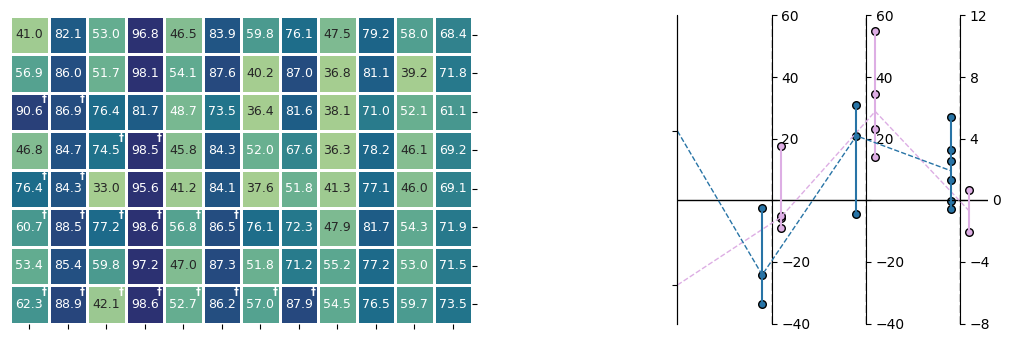

In [372]:
# left plot
def prepare_annot_for_heatmap(data):
    annot = np.array(data).copy()
    for i in range(annot.shape[0]):
        for j in range(annot.shape[1]):
            annot[i, j] = "{:.1f}".format(float(annot[i, j]))
    return annot


fig, axes = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={
                         "width_ratios": [1, 0.46]})

heat = sns.heatmap(
    data_heatmap,
    cbar=False,
    cmap=sns.color_palette("crest", as_cmap=True),
    annot=prepare_annot_for_heatmap(data_heatmap),
    ax=axes[0],
    yticklabels=False,
    xticklabels=False,
    fmt="",
    square=True,
    linewidths=0.8,
    annot_kws={"size": 9},
    vmin=40,
    vmax=95,
)

mask = np.array(mask).astype(bool)


# Add asterisks to the specified cells
for i in range(data_heatmap.shape[0]):
    for j in range(data_heatmap.shape[1]):
        if not mask[i, j]:  # Check if the cell is marked for asterisk
            axes[0].text(
                j + 0.88,  # Adjust position slightly to the right of the cell
                i + 0.18,  # Center vertically
                "†",
                color="white",  # Asterisk color (contrast with heatmap)
                fontsize=7,
                ha="center",
                va="center",
                weight="bold",
            )

axes[0].tick_params(right=True, left=False, labelleft=False)
axes[0].set_yticks(np.arange(8) + 0.5)
axes[0].set_xticks(np.arange(12) + 0.5)
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# right plot
middle_axes = [axes[1].twinx() for _ in range(3)]
ax2 = axes[1].twinx()

right_ylim = [-40, 60]
left_ylim = [0, 8]
relative_y_ticks = [1, 5]
relative_familys = ["SigLIP", "CLIP"]
delta_x = [0.1, -0.1]
relative_y_ticks_mapped = [
    x * (right_ylim[1] - right_ylim[0]) / (left_ylim[1] - left_ylim[0]) + left_ylim[0] for x in relative_y_ticks
]

axes[1].axvline(x=1, color="lightgray", ls="--")
axes[1].axvline(x=2, color="lightgray", ls="--")
axes[1].axvline(x=3, color="lightgray", ls="--")
ax2.axhline(y=0, color="black", ls="-", lw=1)

axes[1].spines["top"].set_visible(False)
axes[1].spines["bottom"].set_visible(False)
axes[1].spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["right"].set_visible(False)

for i, ax in enumerate(middle_axes):

    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.spines["right"].set_position(("axes", (i + 1) / 3.3))

    yticklabels = ax.get_yticklabels()
    yticklabels[2].set_visible(False)

    if i < 2:
        ax.set_ylim(right_ylim)
        # ax.annotate("0", xy=(i + 1.2, y_p - 0.8), ha="right", va="top")
        # ax.set_yticklabels(yticklabels)
        # ax.get_yticklabels()[2].set_visible(False)
    else:
        # ax.annotate("0", xy=(i + 1.16, y_p - 0.5), ha="right", va="top")
        ax.set_yticks([-8, -4, 0, 4, 8, 12])
        ax.set_ylim([x / 5 for x in right_ylim])

# plot
color_map = {"CLIP": "#2874a6", "SigLIP": "#ddaee4", "Qwen": "#86aaa0"}
for i, (family, value) in enumerate(zip(relative_familys, relative_y_ticks_mapped)):
    color = color_map[family]
    start_y = value + right_ylim[0]
    rq1, rq2, rq3 = get_model_family_rq(df_rq, family)

    ax2.plot(
        [0, 1 + delta_x[i], 2 + delta_x[i], 3 + delta_x[i]],
        [start_y, np.median(rq1), np.median(rq2), np.median(rq3)],
        ls="--",
        c=color,
        lw=1,
    )
    ax2.plot([1 + delta_x[i], 1 + delta_x[i]],
             [np.min(rq1), np.max(rq1)], c=color)
    ax2.plot([2 + delta_x[i], 2 + delta_x[i]],
             [np.min(rq2), np.max(rq2)], c=color)
    ax2.plot([3 + delta_x[i], 3 + delta_x[i]],
             [np.min(rq3), np.max(rq3)], c=color)

    ax2.scatter(
        [1 + delta_x[i]] * len(rq1) + [2 + delta_x[i]] *
        len(rq2) + [3 + delta_x[i]] * len(rq3),
        rq1 + rq2 + rq3,
        c=color,
        edgecolors="black",
        s=30,
    )


# df_rq = pd.DataFrame(RQ_data).dropna()
# df_rq["RQ"] = pd.Categorical(df_rq["RQ"], ["RQ0", "RQ1", "RQ2", "RQ3"])

axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels([])
# axes[1].axhline(y=0, color="lightgray", ls="--")

# sns.lineplot(
#     data=df_rq,
#     x="RQ",
#     y="value",
#     hue="model_family",
#     sort=True,
#     ax=ax2,
#     hue_order=["LLaVA", "Qwen", "Gemma"],
#     legend=False,
# )
# sns.stripplot(
#     data=df_rq, x="RQ", y="value", hue="model_family", ax=ax2, hue_order=["LLaVA", "Qwen", "Gemma"], legend=False
# )


ax2.set_ylim(right_ylim)
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.set_ylabel("")
ax2.set_xlim([0, 3.3])

axes[1].set_xticks([])
axes[1].set_yticklabels([])
axes[1].set_yticks(relative_y_ticks_mapped)
axes[1].set_ylim([0, right_ylim[1] - right_ylim[0]])

ax2.annotate("0", xy=(1.04, -0.1), xycoords=("axes fraction",
             "data"), ha="right", va="center")

plt.savefig(
    "heatmap/diagnosis.png",
    dpi=1000,
    bbox_inches="tight",
)

NameError: name 'plt' is not defined